Instalar las siguientes librerias y reiniciar el kernel

In [1]:
#!pip install tensorflow
#!pip install keras
#!pip install --upgrade keras
#!pip install ipympl

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from matplotlib import cm
from formulaic import Formula
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from time import time
import logging
import os

# Estas dos lineas son para silenciar las advertencias de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR)
import tensorflow as tf
import keras

from tf_regressor import train_test_split_scale_center

/home/matias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Redes Neuronales

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024

### 1. Perceptrón Simple : clasificación binaria 

Armaremos una red neuronal para predecir si una persona tiene o no diabetes a partir de 8 caracteristicas:
- Embarazos
- Glucosa
- Presión sanguínea
- Grosor de la piel
- Insulina
- Indice de masa corporal (BMI)
- Antecedentes familiares
- Edad

Como se trata de un problema de clasificación, la función de activación será la función sigmoidea.

In [3]:
# Cargamos el dataset y descartamos las observaciones con campos faltantes
data = pd.read_csv('dataset/diabetes.csv')
data.dropna(inplace=True)

# Definimos las variables.
X = data.drop('Outcome', axis=1)    # Queremos todas las columnas salvo Outcome
y = data['Outcome']

# Escalamos y centramos X, definimos conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split_scale_center(X, y, test_size=0.2, random_state=42)

In [4]:
# En pro de la reproducibilidad, especificamos la semilla para keras
keras.utils.set_random_seed(11)

# Paso 1: iniciamos el modelo indicando la arquitectura de la red
model = keras.Sequential([
    keras.layers.Input(shape=(8,)),             # Capa de input: indicamos que el input tiene dimension 4
    keras.layers.Dense(1,                       # Capa de output: el output tiene dimension 1 (clasificacion binaria), osea queremos una sola neurona en la salida.
                       activation='sigmoid')    # y su funcion de activacion es la sigmoidea.
])

In [5]:
# Paso 2: configuramos el optimizador: usaremos Descenso por Gradiente Estocástico (SGD) con learning rate constante 0.5
# Documentacion SGD : https://keras.io/api/optimizers/sgd/ 
optimizer = keras.optimizers.SGD(learning_rate=0.5)

In [6]:
# Paso 3: construimos el modelo
model.compile(
    optimizer=optimizer,            # Optimizador a utilizar
    loss='binary_crossentropy',     # Funcion de perdida para clasificacion binaria
    metrics=['accuracy',            # Metricas a registrar durante el entrenamiento
             'false_negatives']     # Falsos negativos pues queremos evitar decirle a alguien que tiene diabetes cuando realmente no tiene.
)

In [7]:
# Paso 4: entrenamiento del modelo. 
# model.fit devuelve un objeto History que guarda la evolucion del valor de la funcion de perdida y de las metricas 
# luego de cada epoca.
hist = model.fit(X_train.to_numpy(), y_train.to_numpy(),    # Ingresamos los datos de entrenamiento
                 epochs=150,                                 # Especificamos la cantidad de épocas
                 batch_size=20,                             # Especificamos el tamaño del batch
                 validation_split=0.2,                      # 20% de datos para validación
                 verbose=0,                                 # Opcional, para que no muestre el proceso de entrenamiento.
                 )

ValueError: in user code:

    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1055, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1149, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/metrics/__init__.py", line 204, in get
        return deserialize(str(identifier))
    File "/home/matias/.local/lib/python3.10/site-packages/keras/metrics/__init__.py", line 158, in deserialize
        return deserialize_keras_object(
    File "/home/matias/.local/lib/python3.10/site-packages/keras/saving/legacy/serialization.py", line 543, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: 'false_negatives'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
# Paso 5: calculamos el error en el conjunto de testeo
model.evaluate(X_test.to_numpy(), y_test.to_numpy(),
               verbose=0,
               batch_size=len(y_test),
               return_dict=True
               )

ValueError: in user code:

    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1149, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/matias/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/home/matias/.local/lib/python3.10/site-packages/keras/metrics/__init__.py", line 204, in get
        return deserialize(str(identifier))
    File "/home/matias/.local/lib/python3.10/site-packages/keras/metrics/__init__.py", line 158, in deserialize
        return deserialize_keras_object(
    File "/home/matias/.local/lib/python3.10/site-packages/keras/saving/legacy/serialization.py", line 543, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: 'false_negatives'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
# Armamos una funcion para graficar el error a través de las épocas
def graficar_error(history, error_name):
    x_arr = np.array(history.epoch)    # en el atributo epoch, history guarda una lista de epocas
    plot = (
        so.Plot()
        .add(so.Line(color='blue'), x=x_arr, y=history.history[error_name], label='Entrenamiento')
        .add(so.Line(color='orange'), x=x_arr, y=history.history[f'val_{error_name}'], label='Validacion')
        .label(title=error_name)
    )
    plot.show()

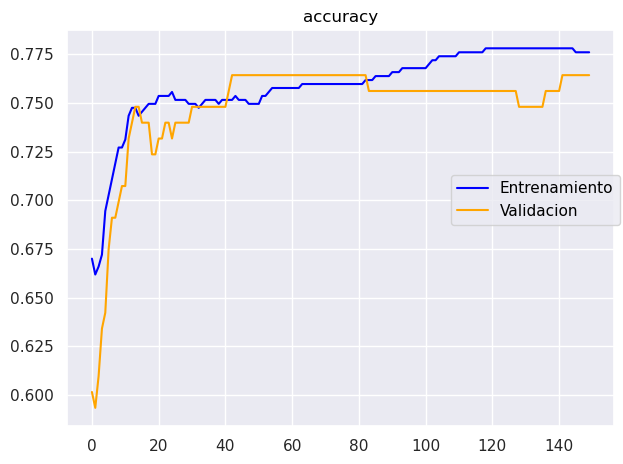

In [ ]:
graficar_error(hist, 'accuracy')

Analizando los pesos, podemos interpretar qué factor es más influyente en el diagnóstico de diabetes

In [ ]:
# Aqui se guardan los pesos en la primera coordenada y el bias en la segunda
model.weights

# Recuperamos los pesos:
weights = model.weights[0].numpy().flatten()

# Armamos una Serie para simplificar el análisis
pd.Series(weights, index=X_train.columns, name='Peso en la RN')

### 2. Perceptrón Simple : clasificación en más de dos categorías

Ahora, dadas las cuatro características de los pingüinos (peso, longitud de aleta y profundidad y longitud del pico), 
intentaremos predecir de qué especie es (Adelie, Chinstrap o Gentoo).

In [ ]:
# Cargamos el dataset y descartamos las observaciones con campos faltantes
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)

# Como en el dataset los pinguinos estan ordenados por especie, estaria bueno mezclar el DataFrame
penguins = penguins.sample(len(penguins))

# Definimos las variables.
X = penguins[['bill_length_mm', 'flipper_length_mm', 'bill_depth_mm', 'body_mass_g']]
# Armamos una Serie las etiquetas: 0 corresponde a Gentoo, 1 corresponde a Adelie, 2 corresponde a Chinstrap
y = penguins['species'].apply(lambda x: 1*(x == 'Adelie') + 2*(x == 'Chinstrap'))    

# Escalamos y centramos X, definimos conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split_scale_center(X, y, test_size=0.2, random_state=21)

In [ ]:
keras.utils.set_random_seed(11)

# Paso 1: iniciamos el modelo indicando la arquitectura de la red
model = keras.Sequential([
    keras.layers.Input(shape=(4,)),             # Capa de input: indicamos que el input tiene dimension 4
    keras.layers.Dense(3,                       # Capa de output: el output tiene dimension 3 (una neurona para cada especie)
                       activation='sigmoid')    # y su funcion de activacion es la sigmoidea.
])

# Paso 2: configuramos el optimizador
optimizer = keras.optimizers.SGD(learning_rate=0.5)

# Paso 3: construimos el modelo
model.compile(
    optimizer=optimizer,                        
    loss='sparse_categorical_crossentropy',     # Funcion de perdida para clasificacion con mas de dos categorias
    metrics=['accuracy']                        
)

# Paso 4: entrenamiento del modelo. 
hist = model.fit(X_train.to_numpy(), y_train.to_numpy(),    
                 epochs=150,                                 
                 batch_size=20,                             
                 validation_split=0.2,                      
                 verbose=0,                                 
                 )

# Paso 5: calculamos el error en el conjunto de testeo
model.evaluate(X_test.to_numpy(), y_test.to_numpy(),
               verbose=0,
               batch_size=len(y_test),
               return_dict=True
               )

In [ ]:
# Graficamos la evolucion de la precision de la clasficiacion
graficar_error(hist, 'accuracy')

### 3. Perceptrón Multicapa

In [ ]:
data = pd.read_csv('nutrition.csv')
data.isna().sum()

In [ ]:
data.shape

In [ ]:
data.dropna(inplace=True)
data.columns

In [ ]:
X = data.drop(columns=['FDC_ID', 'Item', 'Category', 'Calorias_kcal'])
y = data['Calorias_kcal']

# Escalamos y centramos X, definimos conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split_scale_center(X, y, transform_y=True, test_size=0.2, random_state=21)

In [ ]:
keras.utils.set_random_seed(11)

# Paso 1: iniciamos el modelo indicando la arquitectura de la red
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)), 
    keras.layers.Dense(4,                       
                       activation='sigmoid'),
    keras.layers.Dense(1,                       
                       activation='sigmoid')    
])

# Paso 2: configuramos el optimizador
optimizer = keras.optimizers.SGD(learning_rate=0.5)

# Paso 3: construimos el modelo
model.compile(
    optimizer=optimizer,                        
    loss='mean_squared_error',                    
)

# Paso 4: entrenamiento del modelo. 
hist = model.fit(X_train.to_numpy(), y_train.to_numpy(),    
                 epochs=100,                                 
                 batch_size=20,                             
                 validation_split=0.2,                      
                 verbose=0,                                 
                 )

# Paso 5: calculamos el error en el conjunto de testeo
model.evaluate(X_test.to_numpy(), y_test.to_numpy(),
               verbose=0,
               batch_size=len(y_test),
               return_dict=True
               )

In [ ]:
graficar_error(hist, 'loss')